In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss

In [17]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/384453/conversion.csv')

In [18]:
df

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  
0            7350       1    1.430000                 2                    1  
1           17861       2    1.820000                 2                    0  
2             693       0    0.000000                 1                    0  
3            4259       1    1.250000                 1                    0  
4            4133       1    1.290000                 1                    1  
...           ...     ...         ...               ...                  ...  
1138      1129773     252  358.189997                13                    2  
1139       637549     120  173.880003                 3                    0  
1140       151531      28   40.289999                 2                    0  
1141       790253     135  198.710000                 8                    2  
1142       513161     114  165.609999                 5                    2  

[1143 rows x 11 columns]

In [19]:
df.xyz_campaign_id.nunique()

3

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [21]:
df1= df.groupby('fb_campaign_id').Impressions.sum()

In [23]:
e = np.log(df1)

In [25]:
sns.distplot(e, kde = False , bins = 50)

In [27]:
ctr = df.groupby('ad_id').agg({'Clicks': 'sum', 'Impressions' : 'sum'})

In [30]:
ctr['ctr']= ctr.Clicks/ctr.Impressions

In [32]:
ctr.sort_values('ctr', ascending =False)

Clicks  Impressions       ctr
ad_id                                
738637       1          944  0.001059
950224       2         2367  0.000845
951779       2         3277  0.000610
951202       3         5307  0.000565
950537       1         1884  0.000531
...        ...          ...       ...
777166       0         2383  0.000000
777131       0         6359  0.000000
777130       0         6260  0.000000
776935       0         1136  0.000000
747879       0          493  0.000000

[1143 rows x 3 columns]

In [40]:
ctr2 = df.query('xyz_campaign_id == 916').groupby('ad_id').agg({'Clicks': 'sum', 'Impressions' : 'sum'})

In [42]:
ctr2['ctr']= ctr.Clicks/ctr.Impressions

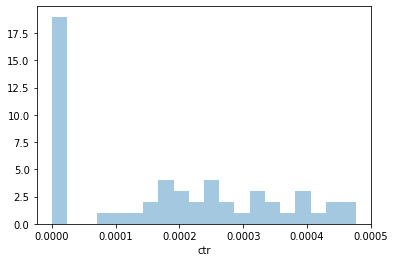

In [45]:
sns.distplot(ctr2.ctr, kde = False , bins = 20)

In [47]:
df['cpc'] = df.Spent/df.Clicks

In [57]:
df

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  \
0            7350       1    1.430000                 2                    1   
1           17861       2    1.820000                 2                    0   
2             693       0    0.000000                 1                    0   
3            4259       1    1.250000                 1                    0   
4            4133       1    1.290000                 1                    1   
...           ...     ...         ...               ...                  ...   
1138      1129773     252  358.189997                13                    2   
1139       637549     120  173.880003                 3                    0   
1140       151531      28   40.289999                 2                    0   
1141       790253     135  198.710000                 8                    2   
1142       513161     114  165.609999                 5                    2   

           cpc  
0     1.430000  
1     0.910000  
2          NaN  
3     1.250000  
4     1.290000  
...        ...  
1138  1.421389  
1139  1.449000  
1140  1.438929  
1141  1.471926  
1142  1.452719  

[1143 rows x 12 columns]

In [54]:
round(ss.iqr(df.cpc, nan_policy='omit'),2)

0.25

In [59]:
dfm = df.query('gender=="M"')

In [60]:
dff = df.query('gender=="F"')

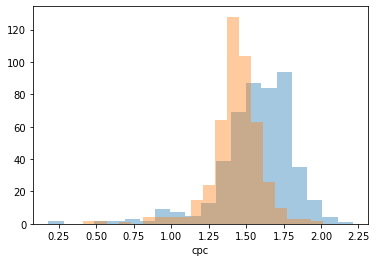

In [63]:
sns.distplot(dfm.cpc.dropna(), kde = False , bins = 20)
sns.distplot(dff.cpc.dropna(), kde = False , bins = 20)

In [71]:
 round(df.query('ad_id==1121814').Approved_Conversion.sum()/df.query('ad_id==1121814').Clicks.sum()*100,2)

3.09